# 1. Í∏∞Î≥∏Ï†ÅÏù∏ Î≤°ÌÑ∞Ïó∞ÏÇ∞

### ùêú=[1,3,4,5], ùêù=[2,4,5,1]

1.1: 3ùêú-8ùêù?

In [1]:
import numpy as np
c = np.array([1,3,4,5])
d = np.array([2,4,5,1])
print(3*c-8*d)


[-13 -23 -28   7]


1.2: ùêú‚ãÖùêù?

In [2]:
print(np.dot(c,d))

39


1.3: ‚Äñùêú‚Äñ+‚Äñùêù‚Äñ?

In [3]:
c_sqrt = np.linalg.norm(c)
d_sqrt = np.linalg.norm(d)
c_sqrt+d_sqrt

13.923758411668118

1.4: ùêúÏôÄ ùêùÏùò Í∞Å ùúÉÏùò cos‚Å°ùúÉ?

In [4]:
np.dot(c,d)/(c_sqrt*d_sqrt)

0.8051941355399506

# 2. ÏÜåÎ¶¨ Ìå®ÌÑ¥ Î∂ÑÏÑù

In [2]:
## librosa ÎØ∏ÏÑ§Ïπò Ïãú Ïã§Ìñâ
# !pip install librosa -q

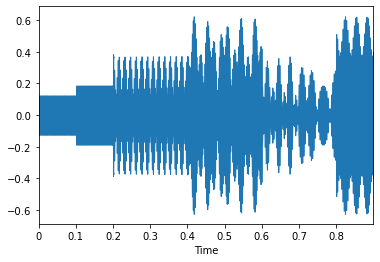

In [3]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import math

fig = plt.figure()
filename = "sound.wav"
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

### BASE = 3Ïò•ÌÉÄÎ∏å C = 130.8128Hz
# $  130.8128\times 2^{\frac{k}{12}} $Hz
# cycle = $ 2\pi \times $ BASE $ \times 2^{\frac{k}{12}} $

In [4]:
TIME = np.linspace(0,0.9,len(data))

BASE_CYCLE = 130.8128 ## 3-Octave C*(ÎèÑ)
index2cycle = lambda x : 2*np.pi*BASE_CYCLE*pow(2,x/12)

CYCLE = np.array([index2cycle(i) for i in [0,2,4,5,7,9,11]])  # c_k  ÎèÑ,Î†à,ÎØ∏,Ìåå,ÏÜî,Îùº,Ïãú

In [5]:
def mse(fnc):
    label=data
    error=np.abs(label-fnc(TIME))
    return np.mean(error)*1500

## Ïó¨Í∏∞ÏÑúÎ∂ÄÌÑ∞ Ìï®ÏàòÎ•º ÎßåÎì§Î©¥ Îê©ÎãàÎã§.

In [6]:
def func1(x):
    sound = np.zeros(len(x))
    return sound

In [7]:
mse(func1)

266.3281566975367

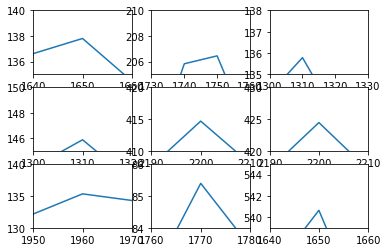

In [13]:
from scipy.io.wavfile import write
test_value = sample_rate

part = len(data)/9 # Ìï®ÏàòÍ∞Ä Îã¨ÎùºÏßÄÎäî Íµ¨Í∞ÑÏùò Í∏∏Ïù¥

data1 = data[:round(part)]                 # 9Í∞úÏùò Ìï®ÏàòÎ°ú ÎßåÎì§Í∏∞ ÏúÑÌï¥ Ï£ºÏñ¥ÏßÑ ÏÜåÎ¶¨Î•º 9Îì±Î∂Ñ ÌñàÏäµÎãàÎã§.
data2 = data[round(part):round(part)*2]
data3 = data[round(part)*2:round(part)*3]
data4 = data[round(part)*3:round(part)*4]
data5 = data[round(part)*4:round(part)*5]
data6 = data[round(part)*5:round(part)*6]
data7 = data[round(part)*6:round(part)*7]
data8 = data[round(part)*7:round(part)*8]
data9 = data[round(part)*8:round(part)*9]

time1 = np.linspace(len(data1)/sample_rate,len(data1)*2/sample_rate,len(data2)) # time1~3 ÏùÄ Í∑∏ÎûòÌîÑÍ∞Ä Ï†ïÏÉÅÏ†ÅÏúºÎ°ú ÎÇòÏò§ÎäîÏßÄ
time2 = np.linspace(len(data1)/sample_rate,len(data1)*2/sample_rate,len(data2)) # ÌôïÏù∏ÌïòÎäîÎç∞ ÏÇ¨Ïö©ÌñàÏóàÏäµÎãàÎã§.
time3 = np.linspace(len(data1)/sample_rate,len(data1)*2/sample_rate,len(data2))

value1 = abs(np.fft.fft(data1,n = sample_rate)) # Íµ¨Í∞ÑÎ≥Ñ ÌîºÌÅ¨Í∞íÏùÑ Ï∞æÍ∏∞ ÏúÑÌï¥ ÎßåÎì† Î≥ÄÏàòÏûÖÎãàÎã§.
value2 = abs(np.fft.fft(data2,n = sample_rate))
value3 = abs(np.fft.fft(data3,n = sample_rate))
value4 = abs(np.fft.fft(data4,n = sample_rate))
value5 = abs(np.fft.fft(data5,n = sample_rate))
value6 = abs(np.fft.fft(data6,n = sample_rate))
value7 = abs(np.fft.fft(data7,n = sample_rate))
value8 = abs(np.fft.fft(data8,n = sample_rate))
value9 = abs(np.fft.fft(data9,n = sample_rate))

frequency = np.fft.fftfreq(n=sample_rate,d=0.1/sample_rate) # Ï£ºÍ∏∞Îäî Í∞ôÏúºÎØÄÎ°ú 1Í∞úÎßå ÎßåÎì§ÏóàÏäµÎãàÎã§.

# Í∑∏ÎûòÌîÑÎ•º Î≥¥Í≥† ÏßÑÌè≠ÏùÑ Íµ¨ÌñàÏäµÎãàÎã§.
plt.grid()
plt.subplot(331)
plt.xlim(1640,1660)
plt.ylim(135,140)
plt.plot(frequency,value1) # 1650, 138

plt.subplot(332)
plt.xlim(1730,1760)
plt.ylim(205,210)
plt.plot(frequency,value2) # 1750, 206.5

plt.subplot(333)
plt.xlim(1300,1330)
plt.ylim(135,138)
plt.plot(frequency,value3) # 1310, 136

plt.subplot(334)
plt.xlim(1300,1320)
plt.ylim(145,150)
plt.plot(frequency,value4) # 1310, 146

plt.subplot(335)
plt.xlim(2190,2210)
plt.ylim(410,420)
plt.plot(frequency,value5) # 2200, 415

plt.subplot(336)
plt.xlim(2190,2210)
plt.ylim(420,430)
plt.plot(frequency,value6) # 2200, 425

plt.subplot(337)
plt.xlim(1950,1970)
plt.ylim(130,140)
plt.plot(frequency,value7) # 1310, 125 / 1650, 129.5 / 1960, 135

plt.subplot(338)
plt.xlim(1760,1780)
plt.ylim(84,86)
plt.plot(frequency,value8) # 1310, 151.5 / 1640, 149 / 1770, 85.5

plt.subplot(339)
plt.xlim(1640,1660)
plt.ylim(539,545)
plt.plot(frequency,value9) # 1650, 540.5

PI = np.pi
nn = 4700

def func_1():
    sound = 136/nn*np.sin(1650*PI*np.linspace(0,0.1,len(data1))) # nn = 4700
    return sound
def func_2():
    sound = 206.5/nn*np.sin(1750*PI*np.linspace(0,0.1,len(data2))) # nn = 35000
    return sound
def func_3():
    sound = 136/nn*np.sin(1310*PI*np.linspace(0,0.1,len(data3)))
    return sound
def func_4():
    sound = 146/nn*np.sin(1310*PI*np.linspace(0,0.1,len(data4)))
    return sound
def func_5():
    sound = 415/nn*np.sin(2200*PI*np.linspace(0,0.1,len(data5)))
    return sound
def func_6():
    sound = 425/nn*np.sin(2200*PI*np.linspace(0,0.1,len(data6)))
    return sound
def func_7():
    sound = 125/nn*np.sin(1310*PI*np.linspace(0,0.1,len(data7)))+129.5/nn*np.sin(1650*PI*np.linspace(0,0.1,len(data7)))
    +135/nn*np.sin(1960*PI*np.linspace(0,0.1,len(data7)))
    return sound
def func_8():
    sound = 151.5/nn*np.sin(1310*PI*np.linspace(0,0.1,len(data8)))+149/nn*np.sin(1640*PI*np.linspace(0,0.1,len(data8)))
    +85.5/nn*np.sin(1770*PI*np.linspace(0,0.1,len(data8)))
    return sound
def func_9():
    sound = 540.5/nn*np.sin(1650*PI*np.linspace(0,0.1,len(data9)))
    return sound
def func_final(TIME):
    if(TIME <= len(data)/9):
        return func_1()
    elif(TIME<= len(data)*2/9):
        return func_2()
    elif(TIME<= len(data)*3/9):
        return func_3()
    elif(TIME<= len(data)*4/9):
        return func_4()
    elif(TIME<= len(data)*5/9):
        return func_5()
    elif(TIME<= len(data)*6/9):
        return func_6()
    elif(TIME<= len(data)*7/9):
        return func_7()
    elif(TIME<= len(data)*8/9):
        return func_8()
    elif(TIME<= len(data)):
        return func_9()

wav1 = 'wav1.wav'
write(wav1,22050,(4096*func_1()).astype(np.int16))

testdata,testsample_rate = librosa.load(wav1)
#librosa.display.waveplot(testdata,sr=testsample_rate)

# testÌï®ÏàòÎäî Í∞Å Íµ¨Í∞ÑÎ≥Ñ Ìï®ÏàòÍ∞Ä Ï†úÎåÄÎ°ú ÎßåÎì§Ïñ¥Ï°åÎäîÏßÄ ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥ ÎßåÎì§ÏóàÏäµÎãàÎã§.
def test(fnc):
    label=data7
    error=np.abs(label-fnc())
    return np.mean(error)*1500

# mse(func_final) Ïã§ÌñâÏù¥ ÏïàÎêòÏÑú ÏïÑÎûò func1Î°ú Ï†úÏ∂úÌïòÍ≤†ÏäµÎãàÎã§.


In [10]:
mse(func1) # Ï†úÍ∞Ä Íµ¨ÌòÑÌïòÎ†§Í≥† ÌñàÎäîÎç∞ Ï†ïÏÉÅ ÏûëÎèôÏù¥ ÏïàÎêòÎäî Í≤É Í∞ôÏäµÎãàÎã§.

266.3281566975367

In [11]:
'''
Í≥†Ï∞∞

Ï≤òÏùåÏóî Í∞ïÏùòÏûêÎ£åÎ°ú Ïò¨ÎùºÏò® ÏûêÎ£åÎì§Í≥º Í∑∏ Î∞©Î≤ïÏúºÎ°ú ÌíÄÏñ¥Î≥¥Î†§Í≥† ÌñàÏóàÏäµÎãàÎã§. Í∑∏Îü∞Îç∞ ÏùΩÏñ¥ÎèÑ Ïñ¥ÎñªÍ≤å Íµ¨ÌòÑÌï¥ÏïºÌï† Î∞©Î≤ïÏùÑ Î™ªÏ∞æÏïÑÏÑú Ïù¥Ï†Ñ Í≥ºÏ†úÏóê
ÏÇ¨Ïö©ÌñàÎçò Î∞©Î≤ïÏùÑ Íµ¨Í∞ÑÏùÑ ÎÇòÎà†ÏÑú Ï†ÅÏö©ÌïòÍ≥† ÎßåÎì§Ïñ¥ÏßÑ Ìï®ÏàòÎì§ÏùÑ Ìï©Ïπ† Îïå ÏÉàÎ°úÏö¥ Ìï®ÏàòÏóê ÌååÎùºÎØ∏ÌÑ∞Í∞íÏóê Îî∞Îùº Íµ¨Í∞ÑÎ≥ÑÎ°ú Îã§Î•∏ Îî∞Î°ú ÎßåÎì§ÏóàÎçò Ìï®ÏàòÎì§ÏùÑ
Î∞òÌôòÌïòÍ≤å Ìï¥ÏÑú Í∞ÅÍ∞ÅÏùò Ìï®ÏàòÎì§ÏùÑ Ïù¥Ïñ¥Î∂ôÏù∏Í≤ÉÍ≥º ÎπÑÏä∑ÌïòÍ≤å ÎßåÎì§Î†§Í≥† ÌñàÏäµÎãàÎã§. ÏÉùÍ∞ÅÌñàÎçòÎåÄÎ°ú Ìï®ÏàòÎì§ÏùÑ ÎßåÎì§Í∏¥ ÌñàÎäîÎç∞ Í≤∞Í≥ºÎäî
ÏÉùÍ∞ÅÍ≥º Îã§Î•¥Í≤å ÎÇòÏôîÏäµÎãàÎã§... 

'''

SyntaxError: invalid syntax (<ipython-input-11-cac955b4d008>, line 3)